In [1]:
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import LineString, Polygon, MultiPolygon
from math import atan2
from gptrajec import transform

Translation: dx = 5.0, dy = -2.113307765892341
Crow length of function line: 10.468842691779795
Distance point A to point B: 28.284271247461902
Scale factor: 2.701757212348878
Rotational relationship: -62.212190767242106°


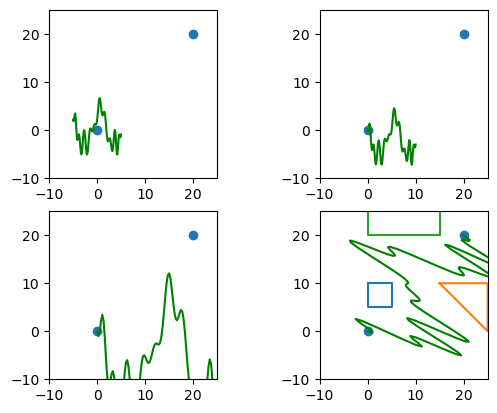

In [2]:
x = np.linspace(-5,5,100)
y = 2*x + 1
y = 2*np.sin(x) + np.sin(4*x) + 3*np.cos(x) + np.sin(2*x) + np.sin(x**2) - np.cos(6*x)
#  !! "invalid value encountered in power" when using fractional exponents !!!

z = np.ones(100)

# Point A and B
pA = np.array([0,0])
pB = np.array([20,20])
a, b = [pA[0],pB[0]],[pA[1],pB[1]]

# setting the axes at the centre
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
#ax1.set_aspect('equal','box')
# show points A and B
ax1.scatter(a, b)
# plot the function
ax1.plot(x,y, 'g')

# now we transform y
# first, translation: ONLY 2D !!!
dy = pA[1] - y[0]
dx = pA[0] - x[0]
print(f'Translation: dx = {dx}, dy = {dy}')
y += dy
x += dx
ax2.plot(x,y, 'g')
# show points A and B
ax2.scatter(a, b)

# length of line

p = np.array([x[0],y[0],1])
q = np.array([x[-1],y[-1],1])

#d = p - q
func_line_len = np.linalg.norm(p - q)
print(f'Crow length of function line: {func_line_len}')

# length of distance pA & pB
dist_ab = np.linalg.norm(pB - pA)
print(f'Distance point A to point B: {dist_ab}')

s = dist_ab / func_line_len
# s = scaleFactor
print(f'Scale factor: {s}')


scaleM = np.array([[s,0,0],
                   [0,s,0],
                   [0,0,1]])

scaled_line = [np.array(coord_set).dot(scaleM) for coord_set in zip(x, y, z)]
x = [coord[0] for coord in scaled_line]
y = [coord[1] for coord in scaled_line]

ax3.plot(x, y, 'g')
ax3.scatter(a, b)

##########################################################################
    # # # # # #     ROTATION    # # # # # # #       # # # # # # #
##########################################################################

th = atan2(pB[1]-pA[1],pB[0]-pA[0]) - atan2(q[1]-p[1],q[0]-p[0])
th *= -1
#th = abs(th)
print(f'Rotational relationship: {np.rad2deg(th)}°')
c = np.cos(th)
d = np.sin(th)
roteM = np.array([[c,-d,0],
                  [d,c,0],
                  [0,0,1]])

roted_line = [np.array(coord_set).dot(roteM) for coord_set in zip(x, y, z)]
x = [coord[0] for coord in roted_line]
y = [coord[1] for coord in roted_line]

ax4.plot(x, y, 'g')






building = Polygon([(0,10),
                    (5,10),
                    (5,5),
                    (0,5)
                    ])

military = Polygon([(15,10),
                    (25,10),
                    (25,0)
                    ])

nofly = Polygon([(0,25),
                (15,25),
                (15,20),
                (0,20)
                ])

barriers = [building, military, nofly]

for barrier in barriers:
    ax4.plot(*barrier.exterior.xy)








    
# show points A and B
ax4.scatter(a, b)

#ax.set_aspect('equal', 'box')

for ax in [ax1,ax2,ax3,ax4]:    
    ax.set_xlim([-10,25])
    ax.set_ylim([-10,25])
    ax.set_aspect('equal')
plt.show()

Translation: dx = -5.0, dy = 0.5211894361150108
Translation1: dx = 0.0, dy = 0.0
Scale factor: 2.811163166812808
Line: 10.061412151870769
Dist: 28.284271247461902
[[2.81116317 0.         0.        ]
 [0.         2.81116317 0.        ]
 [0.         0.         1.        ]]
Delta theta: -51.33368509779071°
[[ 0.62478372  0.78079786  0.        ]
 [-0.78079786  0.62478372  0.        ]
 [ 0.          0.          1.        ]]
[[ 1.75636898  2.19495019  0.        ]
 [-2.19495019  1.75636898  0.        ]
 [ 0.          0.          1.        ]]


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_aspect'

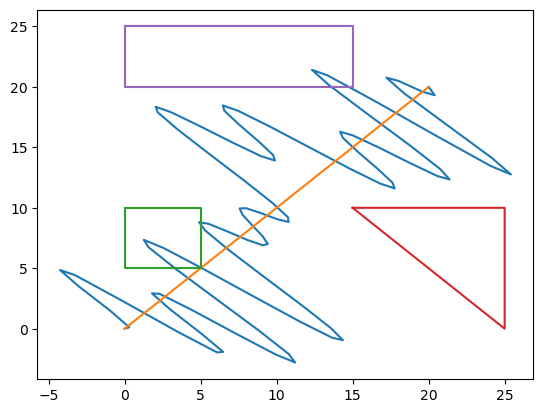

In [6]:
# 100 linearly spaced numbers
x = np.linspace(-5,5,100)

# the function, which is y = x^3 here
#y = x**3 + np.sin(x)**2 - np.exp(x)
y = 2*x + 1
y = np.sin(x) + 0.8*np.sin(4*x) + np.cos(x) + 0.6*np.sin(2*x) + np.sin(x**2) - 1.2*np.cos(6*x)
# note: coefficients directly affect amplitudes
#       factors in argument directly affect wavelength
#  !! "invalid value encountered in power" when using fractional exponents !!!

z = np.ones(100)

# Point A and B
pA = np.array([0,0])
pB = np.array([20,20])
a, b = [pA[0],pB[0]],[pA[1],pB[1]]

line = np.column_stack((x,y))
t_line = transform(line, [pA,pB])
t_line = np.array(t_line)
plt.plot(t_line[:,0],t_line[:,1])
plt.plot(a,b)
for barrier in barriers:
    plt.plot(*barrier.exterior.xy)
plt.show()

In [15]:
type(t_line)


list

In [4]:
line = LineString(t_line)
for barrier in barriers:
    print(line.intersects(barrier))


True
False
True


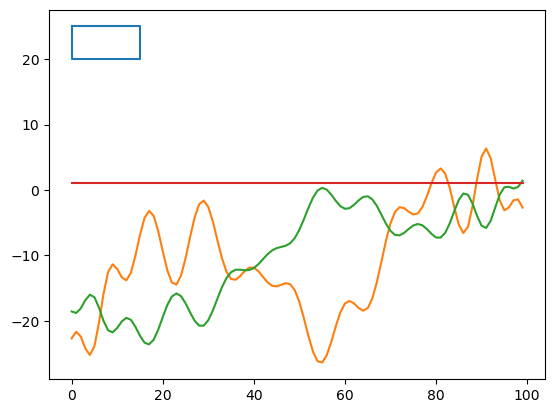

In [13]:
plt.plot(*nofly.exterior.xy)
plt.plot(line)